# Principal component analysis (PCA) <br> 

An **unsupervised learning** method that is often used to reduce the dimensionality of the dataset by transforming a large set into a lower set that still contains most of the information of the large set. <br>
PCA finds a new set of dimensions such that all the dimensions are orthogonal and ranled according to the variance of data. <br>
- The transformed features are linearly independant <br>
- Dimensionality can be reduced by taking only the dimensions with the highest importance <br>
- Those newly found dimensions should minimize the projection error <br>
- The projected points should have maximum spread i.e. maximum variance 

Calculate eigenvectors of $Cov(X,X)$. The eigenvctors points in the direction of the maximum variance, and the corresponding eigenvalues indicate the importance of its corresponding eigenvector : $A.u = \lambda u$.

In [2]:
import numpy as np
from collections import Counter
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 


In [4]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components 
        self.mean = None
        self.components = None

    def fit(self,X):
        # mean centring 
        self.mean = np.mean(X, axis = 0)
        X = X - self.mean

        # covariance
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues 
        eigenvectors, eigenvalues = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        id = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[id]
        eigenvectors = eigenvectors[id]
        
        self.components = eigenvectors[:self.n_components]

    def transform(self,X):
        # projects data 
        X = X - self.mean 
        return np.dot(X, self.components.T)


In [5]:
data = datasets.load_iris()
X, y = data.data, data.target 

In [6]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('shape of X :', X.shape)
print('shape of transformed X :', X_projected.shape)

shape of X : (150, 4)
shape of transformed X : (150, 2)


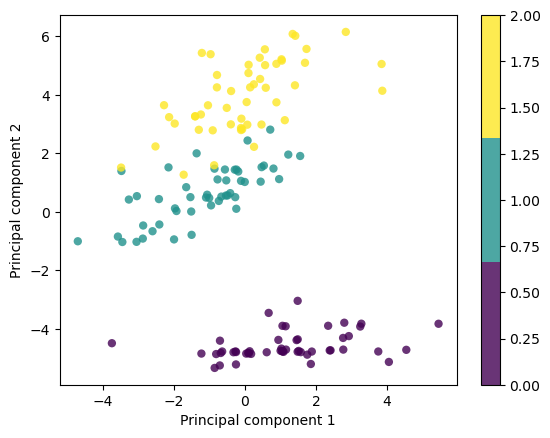

In [8]:
plt.scatter(X_projected[:,0], X_projected[:,1], c=y, edgecolor = 'none', alpha = 0.8, cmap = plt.cm.get_cmap("viridis",3) )
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar()
plt.show()

[0.92461872 0.05306648]


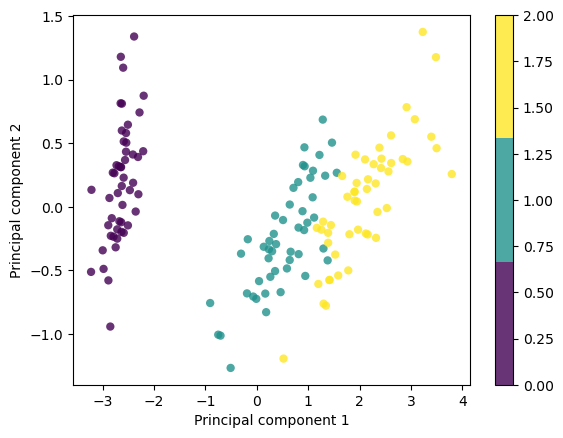

In [15]:
from sklearn.decomposition import PCA 
model = PCA(n_components= 2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', 
            n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
model.fit(X)
print(model.explained_variance_ratio_)
transformed_X = model.transform(X)
plt.scatter(transformed_X[:,0], transformed_X[:,1], c=y, edgecolor = 'none', alpha = 0.8, cmap = plt.cm.get_cmap("viridis",3) )
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar()
plt.show()